In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

In [28]:
profiles = pd.read_csv("CSV Files/customer_profiles.csv")
details = pd.read_csv("CSV Files/ad_details.csv")
events = pd.read_csv("CSV Files/ad_events.csv")

In [29]:
profiles

,gender,age,id,became_member_on (year month day),income,ever_married,kids,home_state
0,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,No,3,North Dakota
1,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,Yes,0,Florida
2,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0,Yes,3,Florida
3,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0,Yes,5,Missouri
4,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0,Yes,5,South Dakota
...,...,...,...,...,...,...,...,...
14820,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0,No,0,Tennessee
14821,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0,No,4,Ohio
14822,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0,No,2,Rhode Island
14823,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0,No,0,Florida


In [30]:
details

,reward,channels,required_amount,duration (days),offer_type,ad id
0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [31]:
events

,customer,event,event_info,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


In [32]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14825 entries, 0 to 14824
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             14825 non-null  object 
 1   age                                14825 non-null  int64  
 2   id                                 14825 non-null  object 
 3   became_member_on (year month day)  14825 non-null  int64  
 4   income                             14825 non-null  float64
 5   ever_married                       14825 non-null  object 
 6   kids                               14825 non-null  int64  
 7   home_state                         14825 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 926.7+ KB


In [33]:
details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   reward           10 non-null     int64 
 1   channels         10 non-null     object
 2   required_amount  10 non-null     int64 
 3   duration (days)  10 non-null     int64 
 4   offer_type       10 non-null     object
 5   ad id            10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


In [34]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   customer    306534 non-null  object
 1   event       306534 non-null  object
 2   event_info  306534 non-null  object
 3   time        306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [35]:
profiles.describe()

,age,became_member_on (year month day),income,kids
count,14825.000000,1.482500e+04,14825.000000,14825.000000
mean,54.393524,2.016689e+07,65404.991568,1.690793
std,17.383705,1.188565e+04,21598.299410,1.475529
min,18.000000,2.013073e+07,30000.000000,0.000000
25%,42.000000,2.016052e+07,49000.000000,0.000000
50%,55.000000,2.017080e+07,64000.000000,2.000000
75%,66.000000,2.017123e+07,80000.000000,3.000000
max,101.000000,2.018073e+07,120000.000000,5.000000


In [36]:
events.describe()

,time
count,306534.000000
mean,366.382940
std,200.326314
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


In [37]:
profiles.nunique()

gender                                   3
age                                     84
id                                   14825
became_member_on (year month day)     1707
income                                  91
ever_married                             2
kids                                     6
home_state                              50
dtype: int64

In [38]:
profiles['ever_married'].unique()

array(['No', 'Yes'], dtype=object)

In [39]:
profiles['gender'].unique()

array(['F', 'M', 'O'], dtype=object)

In [40]:
details.nunique()

reward              5
channels            4
required_amount     5
duration (days)     5
offer_type          3
ad id              10
dtype: int64

In [41]:
details['offer_type'].unique()

array(['bogo', 'informational', 'discount'], dtype=object)

In [42]:
details['required_amount'].unique()

array([10,  0,  5, 20,  7], dtype=int64)

In [43]:
details['channels'].unique()

array(["['email', 'mobile', 'social']",
       "['web', 'email', 'mobile', 'social']",
       "['web', 'email', 'mobile']", "['web', 'email']"], dtype=object)

In [44]:
events.nunique()

customer      17000
event             4
event_info     5121
time            120
dtype: int64

In [45]:
for col in profiles.columns:
    temp = profiles[col].isnull().sum()
    if temp > 0:
        print(f'Column {col} contains {temp} null values.')

In [46]:
for col in events.columns:
    temp = events[col].isnull().sum()
    if temp > 0:
        print(f'Column {col} contains {temp} null values.')

In [47]:
for col in details.columns:
    temp = details[col].isnull().sum()
    if temp > 0:
        print(f'Column {col} contains {temp} null values.')

In [48]:
profiles

,gender,age,id,became_member_on (year month day),income,ever_married,kids,home_state
0,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,No,3,North Dakota
1,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,Yes,0,Florida
2,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0,Yes,3,Florida
3,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0,Yes,5,Missouri
4,M,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0,Yes,5,South Dakota
...,...,...,...,...,...,...,...,...
14820,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0,No,0,Tennessee
14821,M,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0,No,4,Ohio
14822,M,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0,No,2,Rhode Island
14823,F,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0,No,0,Florida


In [49]:
for col in profiles.drop(['id', 'age', 'income', 'became_member_on (year month day)'], axis=1).columns:
    if profiles[col].dtype == object:
        le = LabelEncoder()
        profiles[col] = le.fit_transform(profiles[col])

In [50]:
profiles

,gender,age,id,became_member_on (year month day),income,ever_married,kids,home_state
0,0,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0,0,3,33
1,0,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0,1,0,8
2,1,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0,1,3,8
3,1,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0,1,5,24
4,1,58,2eeac8d8feae4a8cad5a6af0499a211d,20171111,51000.0,1,5,40
...,...,...,...,...,...,...,...,...
14820,0,45,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,54000.0,0,0,41
14821,1,61,2cb4f97358b841b9a9773a7aa05a9d77,20180713,72000.0,0,4,34
14822,1,49,01d26f638c274aa0b965d24cefe3183f,20170126,73000.0,0,2,38
14823,0,83,9dc1421481194dcd9400aec7c9ae6366,20160307,50000.0,0,0,8


In [51]:
scaler = StandardScaler()
data = scaler.fit_transform(profiles.drop(['id'], axis=1))

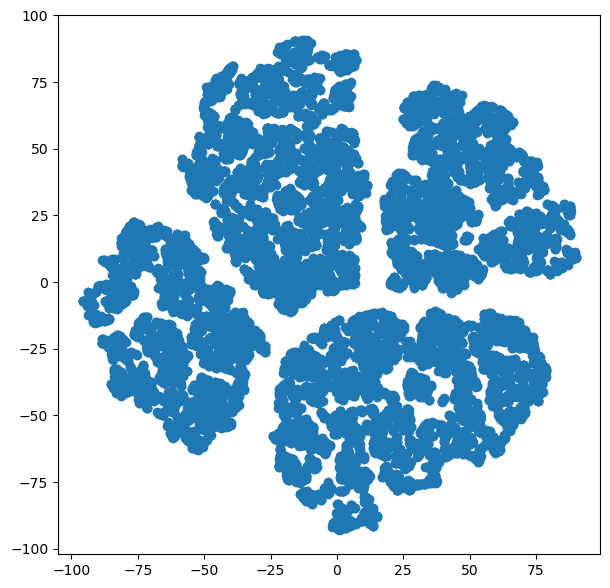

In [52]:
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit_transform(data)
plt.figure(figsize=(7, 7))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
plt.show()

In [53]:
error = []
for n_clusters in range(1, 51):
    model = KMeans(init='k-means++',
                   n_clusters=n_clusters,
                   max_iter=500,
                   random_state=22)
    model.fit(profiles.drop('id', axis=1))
    error.append(model.inertia_)

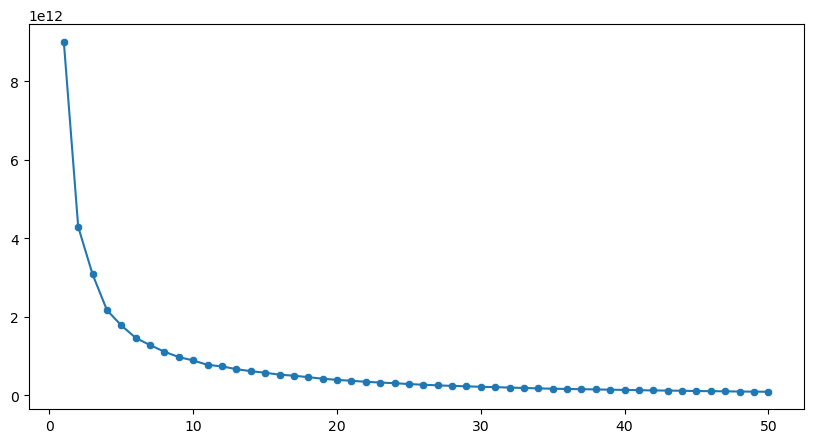

In [54]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(1, 51), y=error)
sns.scatterplot(x=range(1, 51), y=error)
plt.show()

In [55]:
model = KMeans(init='k-means++',
               n_clusters=4,
               max_iter=500,
               random_state=0)
segments = model.fit_predict(profiles.drop('id', axis=1))

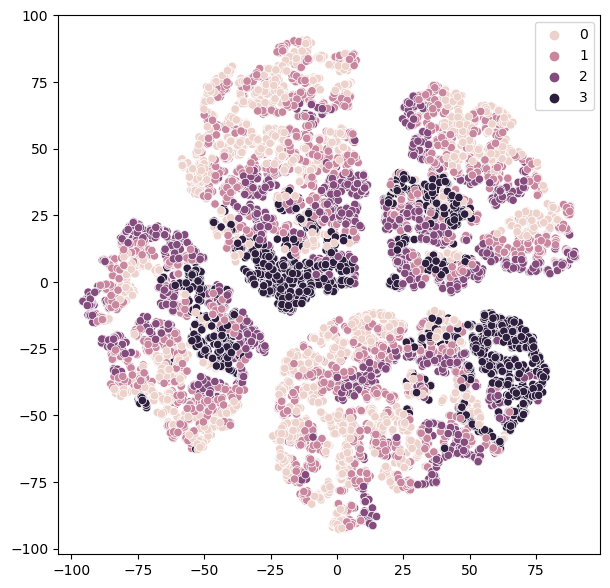

In [56]:
plt.figure(figsize=(7, 7))
sns.scatterplot(tsne_data[:, 0], tsne_data[:, 1], hue=segments)
plt.show()